### 1강
- [Python 예제 코드](https://github.com/sunkyoo/opencv4cvml/tree/master/python)  
- [OpenCV Tutorials](https://docs.opencv.org/master/)

### 컴퓨터 비전 응용 분야
- #### Amazon go

그레이스케일 : 0 ~ 255 (밝기 성분)

python > numpy.uint8로 표현


컬러 영상 : 0 ~ 255 (각각 R, G, B 색상)

0 : 해당 색 성분이 전혀 없는 상태 (0, 0, 0 = 검정)
255 : 해당 색 성분이 가득 있는 상태 (255, 255, 255 = 흰색)

Python > 튜플, numpy.ndarray로 표현


### 영상 데이터의 크기

- #### 최적화 및 알고리즘 효율이 중요하다.
- #### 그레이스케일 영상 : (가로크기) * (세로 크기) Bytes
    - 512 * 512 = 262144 Bytes

- #### 트루컬러 영상 : (가로크기) * (세로 크기) * 3 Bytes
    - 1920 * 1080 * 3 = 6220800 Bytes = 6MBytes


영상 파일 형식 특징

- ### BMP
    - ##### 픽셀 데이터를 압축하지 않고 그대로 저장(파일 용량이 큰 편)
    - ##### 파일 구조가 단순해서 별도의 라이브러리 도움 없이 파일 입출력 프로그래밍 가능
- ### JPG
    - ##### 주로 사진과 같은 컬러 영상을 저장
    - ##### 손실 압축(lossy compression 픽셀 값이 조금씩 바뀐다.)
    - ##### 압축률이 좋아서 파일 용량이 크게 감소(디지털 카메라 사진 포맷으로 주로 사용)
- ### GIF
    - ##### 256 색상 이하의 영상을 저장
    - ##### 영상처리에서 주로 사용 x
    - ##### 무손실 압축(lossless compression)
    - ##### 움직이는 GIF 지원
- ### PNG
    - ##### Portable Network Graphics
    - ##### 무손실 압축(컬러 영상도 무손실)
    - ##### 알파 채널(투명도)을 지원

### OpenCV
- Open source
- (https://opencv.org/)
- OpenCV 함수 설명
    - (https://docs.opencv.org/master/)
- OpenCV 질답 포럼
    - (https://answers.opencv.org/questions/)
- Main Modules
    - (https://github.com/opencv/opencv)
- Extra Modules
    - (https://github.com/opencv/opencv_contrib/)

In [4]:
# OpenCV install
!pip install opencv-python


In [1]:
import cv2 as cv
import sys

In [2]:
print('Hello, OpenCV', cv.__version__)

Hello, OpenCV 4.4.0


In [3]:
img = cv.imread('cat.bmp')

In [12]:
# grayscale 변환 출력
img = cv.imread('cat.bmp', cv.IMREAD_GRAYSCALE)

In [ ]:
# 영상 파일 속성 그대로 읽기 (투명한 PNG 파일)
img = cv.imread('cat.bmp', cv.IMREAD_UNCHANGED)

In [15]:
# 예외처리 코드
if img is None:
    print('Image load failed!')
    sys.exit()

# 영상 저장하기
cv.imwrite('cat_gray.png', img)

# window 창 생성
# defalut = WINDOW_AUTOSIZE
cv.namedWindow('image')
# cv.namedWindow('image', cv.WINDOW_NORMAL) # 창을 마우스로 resize 가능


# 창에 image 를 보여준다 
cv.imshow('image', img)


# 키보드 입력을 기다리고 영상을 보여주게 해준다 필수
# 27(ESC), 13(ENTER), 9(TAB)
while True:
    if cv.waitKey() == 27:
        break
# while True:
#     if cv.waitKey() == ord('q'):
#         break


# 아무키나 누르면 모든 창을 닫는다.
cv.destroyAllWindows()


### cv2.imread() 함수로 불러온 영상의 색상 정보는 BGR 순서이므로 이를 RGB 순서로 변경해야 함 cv2.cvtColor() 함수 이용
### plt.imshow() 함수에서 컬러맵을 cmap = 'gray'

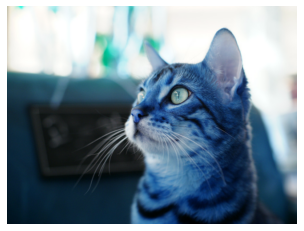

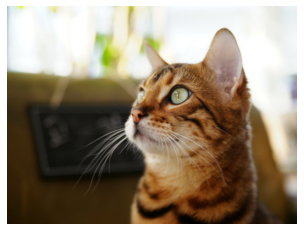

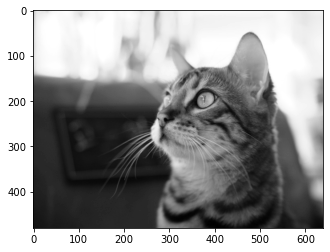

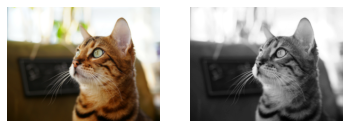

In [5]:
import matplotlib.pyplot as plt


# 컬러 영상 출력
imgBGR = cv.imread('cat.bmp')
imgRGB = cv.cvtColor(imgBGR, cv.COLOR_BGR2RGB)

# Imread BGR Not cvt 
plt.axis('off')
plt.imshow(imgBGR)
plt.show()

plt.axis('off')
plt.imshow(imgRGB)
plt.show()

# 그레이스케일 영상 출력
imgGray = cv.imread('cat.bmp', cv.IMREAD_GRAYSCALE)

# plt.axis('off') # 좌표 축 없애기
plt.imshow(imgGray, cmap='gray')
plt.show()

# 두 개의 영상을 함께 출력
# 121 1행 2열 첫번째
# 122 1행 2열 두번째
plt.subplot(121), plt.axis('off'), plt.imshow(imgRGB)
plt.subplot(122), plt.axis('off'), plt.imshow(imgGray, cmap='gray')
plt.show()

In [ ]:
# 이미지 파일 불러오는 두가지 방법
import os

file_list = os.listdir('.\\images')
img_files = [file for file in file_list if file.endswith('.jpg')]

import glob

img_files = glob.glob('.\\images\\*.jpg')

In [8]:
# 슬라이드 쇼 만들기
import glob

# 이미지 파일을 모두 img_files 리스트에 추가
img_files = glob.glob('.\\images\\*.jpg')

# # file check
# for f in img_files:
#     print(f)

if not img_files:
    print("There are no jpg files in 'images' folder")
    sys.exit()

# 전체 화면으로 'image' 창 생성
cv.namedWindow('image', cv.WINDOW_NORMAL)
cv.setWindowProperty('image', cv.WND_PROP_FULLSCREEN, cv.WINDOW_FULLSCREEN)

# 무한 루프
cnt = len(img_files)
idx = 0

while True:
    img = cv.imread(img_files[idx])

    if img is None:
        print('Image load failed!')
        break

    cv.imshow('image', img)
    if cv.waitKey(1000) >= 0:
        break

    idx += 1
    if idx >= cnt:
        idx = 0

cv.destroyAllWindows()